# 0201 - Advanced EDA With Python - Solution Notebook

* Written by Alexandre Gazagnes
* Last update: 2024-02-01

## About 

### Using Jupyter

You have 2 options: 
- Locally: 

    - **Install Anaconda https://www.anaconda.com/ or Jupyter https://jupyter.org/install on your machine**

    - Use Anaconda or Jupyter installed on the Unilasalle PC (**Warning ⚠️**: some packages may be missing) 


- Online:

    - **Use Google Colab https://colab.research.google.com/** (you have to be connected to your google account)

    - **Open this notebook on Google colab URL**
        * Badge

    - Use Jupyter online  https://jupyter.org/try-jupyter (**Warning ⚠️**: External packages cannot be installed) 


### Material

All the material for this course could be found here.
- https://github.com/AlexandreGazagnes/Unilassalle-Public-Ressources/tree/main/4a-data-analysis

### Context

You're an export project manager for a major food manufacturer. 

You are in charge of poultry departement.

You have been asked to identify countries within the company's database or using external datasets in order to target them.

### Data

After a quick look on the internet, you find a very interesting dataset on the FAO website. It contains a list of countries with various indicators. You decide to use this dataset to identify segments of countries.

Find the data : 
    
- **You can use a preprocessed version of the dataset [here](https://gist.githubusercontent.com/AlexandreGazagnes/28a8da40ffa339b96b02f3e3cd79792d/raw/4849eba0d69f43472a7637e1b62e56fd7eb09c7e/chicken.csv).** (Best option)

- You can also download the "raw" dataset [here](https://www.fao.org/faostat/fr/#data/QCL). (**Warning ⚠️** : You will have to preprocess the data before playing this notebook )


### Mission

Your objective is to : 

- Take a quick tour of the data to understand the data set 

- Clean up the dataset if necessary 

- Try to have a deep understanding of our market, using, PCA or MCA.

- Perform clustering with Kmeans and Agglomerative Clustering, focusing on countries with large potential markets: populous countries, wealthy countries and/or countries with high import levels

- You need to be able to understand and explain the clusters you've created.

## Preliminaries

### System

These commands will display the system information:

Uncomment theses lines if needed. 

In [1]:
# pwd

In [2]:
# cd ..

In [3]:
# ls

In [4]:
# cd ..

In [5]:
# ls

These commands will install the required packages:

**Please note that if you are using google colab, all you need is already installed**

In [6]:
# !pip install pandas matplotlib seaborn plotly scikit-learn

This command will download the dataset:

**Please note that we will download the dataset later, in this notebook**

In [7]:
# !wget https://gist.githubusercontent.com/AlexandreGazagnes/28a8da40ffa339b96b02f3e3cd79792d/raw/4849eba0d69f43472a7637e1b62e56fd7eb09c7e/chicken.csv

### Import 

Import data libraries:

In [8]:
import pandas as pd  # DataFrame
import numpy as np  # Matrix and advanced maths operations

Import Graphical libraries:

In [9]:
import matplotlib.pyplot as plt  # Visualisation
import seaborn as sns  # Visualisation

# import plotly.express as px       # Visualisation (not used here)

Import Machine Learning libraries:

In [10]:
from sklearn.preprocessing import StandardScaler  # Our Standardizer Obj.
from sklearn.decomposition import PCA  # Our PCA Obj.

# for Later :
# from sklearn.cluster import KMeans                        # Clustering
# from sklearn.cluster import AgglomerativeClustering       # Clustering
# from sklearn.metrics import silhouette_score              # Clustering
# from sklearn.metrics import davies_bouldin_score          # Clustering
# from sklearn.datasets import load_iris                    # Toy Dataset
# from scipy.cluster.hierarchy import dendrogram, linkage   # Clustering

:warning:**These imports must be done, it is not possible to use this notebook without pandas, matplotlib etc.**

### Data

1st option : Download the dataset from the web

In [11]:
url = "https://gist.githubusercontent.com/AlexandreGazagnes/28a8da40ffa339b96b02f3e3cd79792d/raw/4849eba0d69f43472a7637e1b62e56fd7eb09c7e/chicken.csv"
df = pd.read_csv(url)
df.head()

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
0,1,Arménie,47.0,35.0,5.44,54.0,0.0,0.0,-2.0,11.0,47.0,2944.791
1,2,Afghanistan,57.0,29.0,0.54,5.0,0.0,0.0,0.0,28.0,55.0,36296.113
2,3,Albanie,47.0,38.0,6.26,85.0,0.0,0.0,4.0,13.0,47.0,2884.169
3,4,Algérie,277.0,2.0,1.97,22.0,0.0,0.0,0.0,275.0,264.0,41389.189
4,7,Angola,319.0,277.0,3.60,35.0,0.0,0.0,-0.0,42.0,315.0,29816.766


2nd Option : Read data from a file

In [12]:
# # or

# fn = "my/awsome/respository/my_awsome_file.csv"
# fn = "./chicken.csv"
# df = pd.read_csv(fn)
# df.head()

## Data Exploration

### Display

Display the first rows of the dataset:

In [13]:
# Head

df.head(20)

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
0,1,Arménie,47.0,35.0,5.44,54.0,0.0,0.0,-2.0,11.0,47.0,2944.791
1,2,Afghanistan,57.0,29.0,0.54,5.0,0.0,0.0,0.0,28.0,55.0,36296.113
2,3,Albanie,47.0,38.0,6.26,85.0,0.0,0.0,4.0,13.0,47.0,2884.169
3,4,Algérie,277.0,2.0,1.97,22.0,0.0,0.0,0.0,275.0,264.0,41389.189
4,7,Angola,319.0,277.0,3.60,35.0,0.0,0.0,-0.0,42.0,315.0,29816.766
5,8,Antigua-et-Barbuda,7.0,7.0,17.77,233.0,0.0,0.0,0.0,0.0,5.0,95.426
6,9,Argentine,1962.0,8.0,13.53,182.0,207.0,0.0,0.0,2161.0,1856.0,43937.140
7,10,Australie,1171.0,16.0,16.60,192.0,42.0,-0.0,71.0,1269.0,1171.0,24584.620
8,11,Autriche,173.0,110.0,7.49,65.0,78.0,-0.0,8.0,148.0,160.0,8819.901
9,12,Bahamas,26.0,24.0,14.61,182.0,0.0,0.0,4.0,6.0,16.0,381.755


Display the last rows of the dataset:

In [14]:
# Tail

df.tail()

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
167,255,Belgique,152.0,338.0,4.57,44.0,656.0,-25.0,-6.0,463.0,144.0,11419.748
168,256,Luxembourg,11.0,11.0,7.19,69.0,1.0,0.0,0.0,0.0,11.0,591.910
169,272,Serbie,90.0,12.0,3.50,35.0,7.0,-0.0,0.0,85.0,90.0,8829.628
170,273,Monténégro,10.0,8.0,5.79,55.0,0.0,0.0,1.0,4.0,10.0,627.563
171,276,Soudan,69.0,2.0,0.54,5.0,0.0,0.0,0.0,67.0,65.0,40813.397


Display a sample of the dataset:

In [15]:
# Sample

df.sample(20)

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
100,143,Maroc,746.0,3.0,7.29,70.0,1.0,-0.0,17.0,762.0,746.0,35581.255
168,256,Luxembourg,11.0,11.0,7.19,69.0,1.0,0.0,0.0,0.0,11.0,591.910
19,32,Cameroun,82.0,0.0,1.07,11.0,0.0,0.0,-0.0,81.0,78.0,24566.073
23,38,Sri Lanka,192.0,0.0,2.64,26.0,2.0,-0.0,-1.0,192.0,164.0,21128.032
94,133,Mali,52.0,1.0,0.96,9.0,0.0,0.0,-4.0,48.0,52.0,18512.430
114,165,Pakistan,1282.0,2.0,1.97,20.0,4.0,-0.0,-3.0,1281.0,1218.0,207906.209
145,214,"Chine, Taiwan Province de",785.0,161.0,11.01,126.0,8.0,-0.0,20.0,652.0,785.0,23674.546
70,105,Israël,636.0,0.0,27.87,234.0,3.0,0.0,-10.0,629.0,556.0,8243.848
138,203,Espagne,1497.0,205.0,12.47,105.0,212.0,-0.0,11.0,1515.0,1418.0,46647.428
162,237,Viet Nam,1206.0,291.0,4.01,48.0,1.0,0.0,2.0,918.0,1166.0,94600.648


In [16]:
# Sample with just 10% of the dataset

df.sample(frac=0.10)

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
104,149,Népal,58.0,0.0,0.67,7.0,0.0,0.0,-0.0,58.0,55.0,27632.681
116,167,Tchéquie,249.0,116.0,7.50,82.0,27.0,0.0,3.0,163.0,234.0,10641.034
93,132,Maldives,12.0,12.0,4.70,47.0,0.0,0.0,0.0,0.0,7.0,496.402
92,131,Malaisie,1621.0,68.0,12.95,142.0,44.0,-1.0,128.0,1724.0,1220.0,31104.646
68,103,Iraq,566.0,470.0,5.37,52.0,0.0,0.0,-0.0,96.0,561.0,37552.781
15,23,Belize,19.0,0.0,8.26,110.0,0.0,0.0,1.0,20.0,10.0,375.769
156,230,Ukraine,1009.0,121.0,7.58,78.0,273.0,0.0,49.0,1211.0,1006.0,44487.709
21,35,Cabo Verde,10.0,12.0,6.52,62.0,0.0,0.0,4.0,1.0,9.0,537.498
83,119,Lettonie,41.0,43.0,7.22,72.0,20.0,0.0,16.0,33.0,41.0,1951.097
42,66,Fidji,26.0,3.0,9.44,97.0,0.0,-0.0,1.0,23.0,25.0,877.459


### Structure

What is the shape of the dataset?

In [17]:
# Structure

df.shape

(172, 12)

What data types are present in the dataset?

In [18]:
# Dtypes

df.dtypes

code_zone       int64
zone           object
dispo_int     float64
import        float64
dispo_prot    float64
dispo_alim    float64
export        float64
residus       float64
var_stock     float64
prod          float64
nourriture    float64
population    float64
dtype: object

:warning: 
**Please note that we have here main python dtypes**
Data types : 
- int : *Integer* : 1,2,12332, 1_000_000
- float : *Float* : 1.243453, 198776.8789, 1.9776
- object : In this example object stands for *String* : "Paris", "Rouen", "Lea" 

Get all the columns names:

In [19]:
# Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   code_zone   172 non-null    int64  
 1   zone        172 non-null    object 
 2   dispo_int   172 non-null    float64
 3   import      172 non-null    float64
 4   dispo_prot  172 non-null    float64
 5   dispo_alim  172 non-null    float64
 6   export      172 non-null    float64
 7   residus     172 non-null    float64
 8   var_stock   172 non-null    float64
 9   prod        172 non-null    float64
 10  nourriture  172 non-null    float64
 11  population  172 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 16.3+ KB


Count the number of columns with specific data types:

In [20]:
# Value counts on dtypes

df.dtypes.value_counts()

float64    10
int64       1
object      1
Name: count, dtype: int64

Select only string columns:

In [21]:
# Select dtypes str

df.select_dtypes(include="object").head()

,zone
0,Arménie
1,Afghanistan
2,Albanie
3,Algérie
4,Angola


Select only numerical columns:

In [22]:
# Select dtypes float

df.select_dtypes(include="float").head()

,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
0,47.0,35.0,5.44,54.0,0.0,0.0,-2.0,11.0,47.0,2944.791
1,57.0,29.0,0.54,5.0,0.0,0.0,0.0,28.0,55.0,36296.113
2,47.0,38.0,6.26,85.0,0.0,0.0,4.0,13.0,47.0,2884.169
3,277.0,2.0,1.97,22.0,0.0,0.0,0.0,275.0,264.0,41389.189
4,319.0,277.0,3.60,35.0,0.0,0.0,-0.0,42.0,315.0,29816.766


Count number of unique values : 

In [23]:
# Number unique values for int columns

df.select_dtypes(include=int).nunique()

code_zone    172
dtype: int64

In [24]:
# Number unique values for float columns

df.select_dtypes(include=float).nunique()

dispo_int     136
import         84
dispo_prot    164
dispo_alim    112
export         50
residus        15
var_stock      55
prod          125
nourriture    131
population    172
dtype: int64

In [25]:
# Number unique values for object columns

df.select_dtypes(include="object").nunique()

zone    172
dtype: int64

### NaN

How many NaN are present in the dataset?

:warning: **Please note that ```NaN``` stands for Not A Number aka ```Missing Value```***

In [26]:
# isna ?
df.isna().head()

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
# Sum of isna

df.isna().sum()

code_zone     0
zone          0
dispo_int     0
import        0
dispo_prot    0
dispo_alim    0
export        0
residus       0
var_stock     0
prod          0
nourriture    0
population    0
dtype: int64

Do we have some Missing values here ?  

### Data Inspection

Have a look to a numercial summary of the dataset:

In [28]:
# Describe ?
df.describe()

,code_zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,1.720000e+02
mean,126.639535,679.598837,88.488372,7.121279,74.558140,103.750000,-2.703488,13.430233,708.325581,649.406977,4.284175e+04
std,72.976310,2175.612987,185.824620,5.603464,60.571277,458.066125,13.271761,74.722417,2474.456332,2125.189092,1.530637e+05
min,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,-125.000000,-119.000000,0.000000,0.000000,5.204500e+01
25%,66.750000,28.750000,3.000000,2.165000,22.000000,0.000000,0.000000,0.000000,11.000000,27.500000,2.874480e+03
50%,121.500000,98.000000,16.000000,6.505000,64.000000,0.000000,0.000000,0.000000,66.000000,94.500000,9.757833e+03
75%,188.250000,360.750000,79.750000,10.365000,105.500000,12.000000,0.000000,7.000000,368.750000,353.750000,3.013874e+04
max,276.000000,18266.000000,1069.000000,27.870000,243.000000,4223.000000,0.000000,859.000000,21914.000000,18100.000000,1.421022e+06


Ok, hard to read...
Let's try something better : 

In [29]:
# Better ?
df.describe().round(0)

,code_zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
count,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0,172.0
mean,127.0,680.0,88.0,7.0,75.0,104.0,-3.0,13.0,708.0,649.0,42842.0
std,73.0,2176.0,186.0,6.0,61.0,458.0,13.0,75.0,2474.0,2125.0,153064.0
min,1.0,0.0,0.0,0.0,0.0,0.0,-125.0,-119.0,0.0,0.0,52.0
25%,67.0,29.0,3.0,2.0,22.0,0.0,0.0,0.0,11.0,28.0,2874.0
50%,122.0,98.0,16.0,7.0,64.0,0.0,0.0,0.0,66.0,94.0,9758.0
75%,188.0,361.0,80.0,10.0,106.0,12.0,0.0,7.0,369.0,354.0,30139.0
max,276.0,18266.0,1069.0,28.0,243.0,4223.0,0.0,859.0,21914.0,18100.0,1421022.0


Compute the correlation matrix:

In [30]:
# creating tmp variable

corr = df.select_dtypes(include="number").corr()
corr.round(4)

,code_zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
code_zone,1.0000,-0.0187,0.0356,-0.0732,-0.1336,0.0177,-0.0573,-0.0171,-0.0163,-0.0182,-0.0578
dispo_int,-0.0187,1.0000,0.2637,0.1775,0.2110,0.6857,0.0001,0.0561,0.9881,0.9987,0.6759
import,0.0356,0.2637,1.0000,0.2191,0.1750,0.1606,-0.4098,0.3032,0.1956,0.2630,0.1516
dispo_prot,-0.0732,0.1775,0.2191,1.0000,0.9726,0.2465,-0.1766,0.0672,0.1873,0.1825,-0.0940
dispo_alim,-0.1336,0.2110,0.1750,0.9726,1.0000,0.2654,-0.1226,0.0578,0.2232,0.2164,-0.0707
export,0.0177,0.6857,0.1606,0.2465,0.2654,1.0000,-0.2812,0.0567,0.7777,0.6980,0.2089
residus,-0.0573,0.0001,-0.4098,-0.1766,-0.1226,-0.2812,1.0000,-0.0042,-0.0213,-0.0037,0.0152
var_stock,-0.0171,0.0561,0.3032,0.0672,0.0578,0.0567,-0.0042,1.0000,0.0673,0.0596,-0.0826
prod,-0.0163,0.9881,0.1956,0.1873,0.2232,0.7777,-0.0213,0.0673,1.0000,0.9894,0.6190
nourriture,-0.0182,0.9987,0.2630,0.1825,0.2164,0.6980,-0.0037,0.0596,0.9894,1.0000,0.6569


Ok ... Not so easy to read ! 

Try a first visualization of the correlation matrix:

<Axes: >

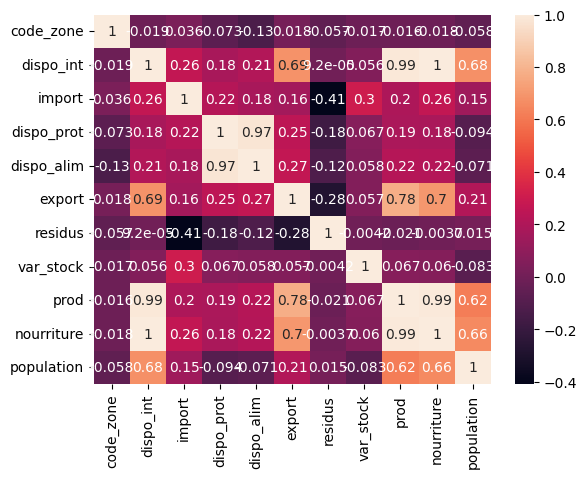

In [31]:
# Building heatmap

sns.heatmap(corr, annot=True)

So far, so good, we have to improve this visualisation! 

<Axes: >

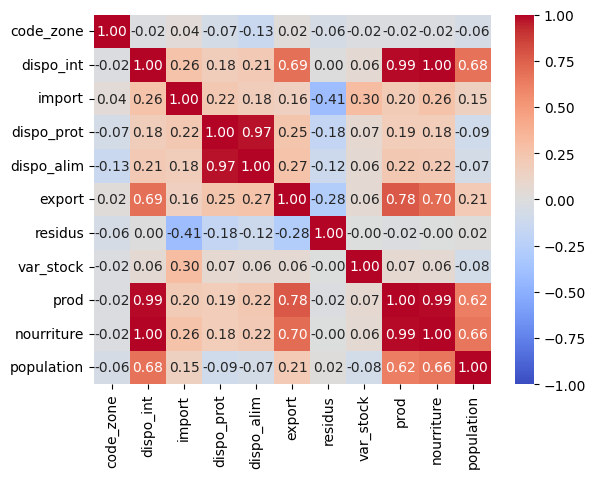

In [32]:
# Better heatmap ?
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)

🤟 Great ! ... Do we have something better ? (better stands for *more readable*)

Find the best visualization for the correlation matrix:

<Axes: >

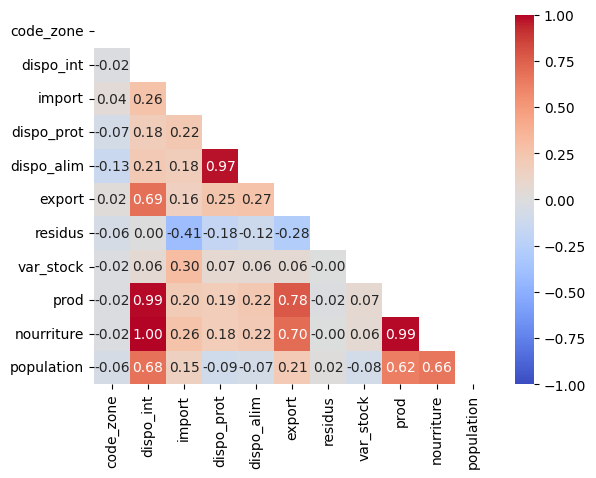

In [33]:
# Best heatmap ?
mask = np.triu(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, mask=mask)

We are gona use this correlation matrix a lot. 
Maybe it is a good idea to create a function !   

Write your first function : 

In [34]:
def add(a, b):

    return a + b

Try it : 

In [35]:
add(1, 1)

2

Just add a triple quote ```""" Some usefull comment """``` after the first line : 

In [36]:
def add(a, b):
    """This function make the addition of a and b and return the result"""

    return a + b

Write a function to display the correlation matrix:

In [37]:
# With a function


def make_corr_heatmap(df):
    """Just compute and plot the correlation matrix with a fancy heat map"""

    corr = df.select_dtypes(include="number").corr()
    mask = np.triu(corr)
    sns.heatmap(
        corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1, mask=mask
    )

Use it : 

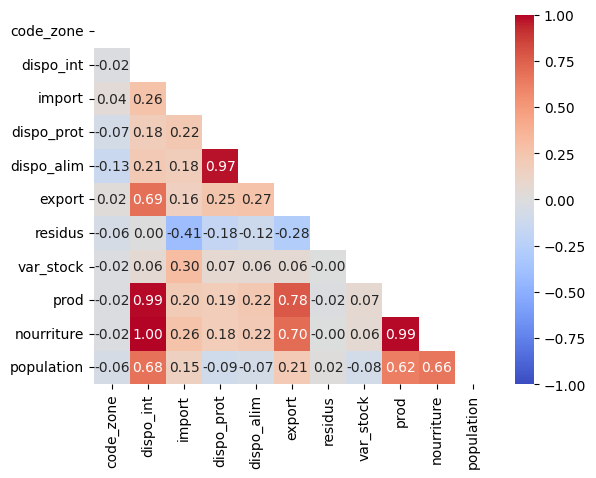

In [38]:
make_corr_heatmap(df)

:clap: Nice ! We will use this visualization a lot in this feature...

### Visualization

Use a Boxplot to visualize the distribution of the numerical columns:

<Axes: ylabel='population'>

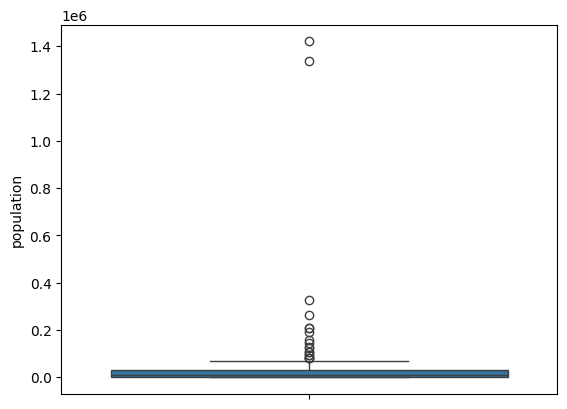

In [39]:
# Box plot
sns.boxplot(data=df.population)

We have a very unbalanced distribution with 2 outliers : China and India

Please note that China do not have 1.4 million citizens but 1.4 BILLION. So we need to fix this (later).

👩‍🎓 Just as fun fact, we can use the log trasnformation to *fix* this distribution.

Try to apply log transformation to the numerical columns:

In [40]:
ser = np.log(df.population)
ser

0       7.987793
1      10.499466
2       7.966992
3      10.630775
4      10.302826
         ...    
167     9.343099
168     6.383355
169     9.085868
170     6.441844
171    10.616766
Name: population, Length: 172, dtype: float64

Display the box plot of our new feature : 

<Axes: ylabel='population'>

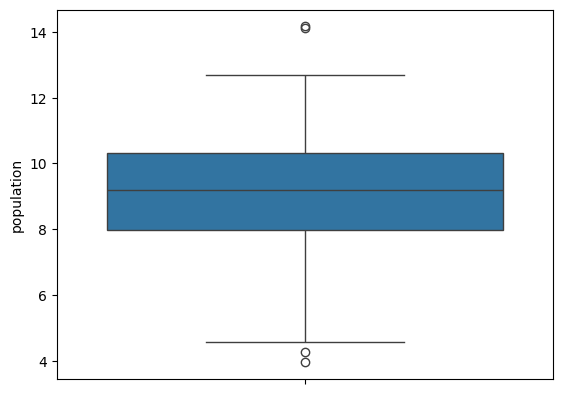

In [41]:
sns.boxplot(ser)

:clap: Great ! 

Let's try an other implementation (same result) : 

<Axes: ylabel='population'>

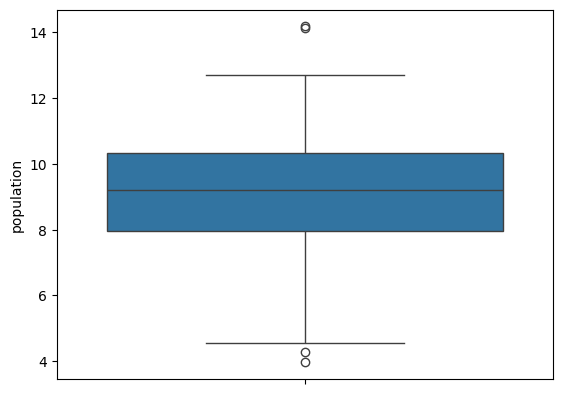

In [42]:
tmp = np.log1p(df.population)  # Here np.log1p(my_feature) == np.log(1 + my_feature)
sns.boxplot(data=tmp)

❓ Why ```log(my_feature + 1 )``` ?

Imagine all the people ... like John Lenon... or better ! Imagine NO PEOPLE, 0 for the population of one country...

What is the output of ```np.log(0)``` ?

Plot all numerical columns:

<Axes: >

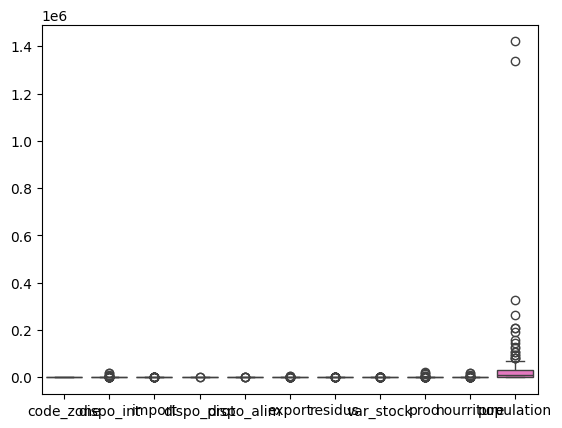

In [43]:
sns.boxplot(data=df.select_dtypes(include="number"))

Plot each numerical column:

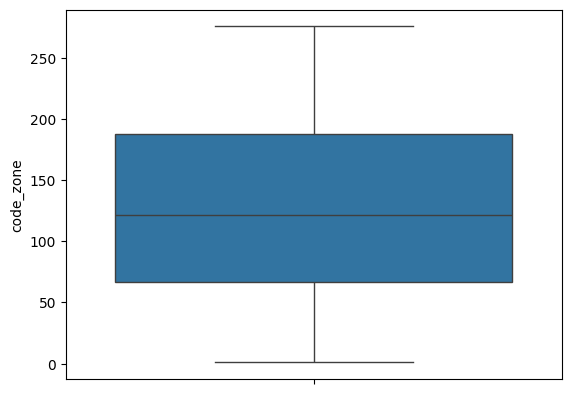

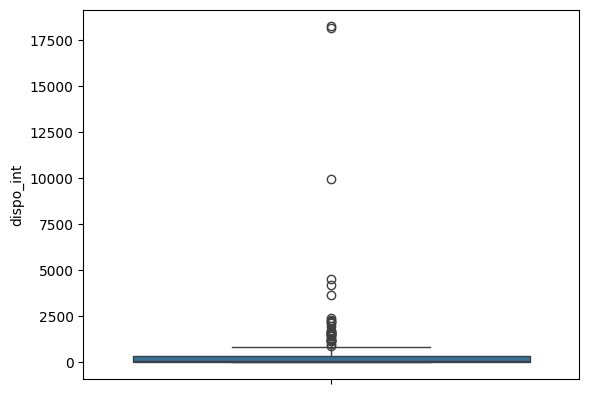

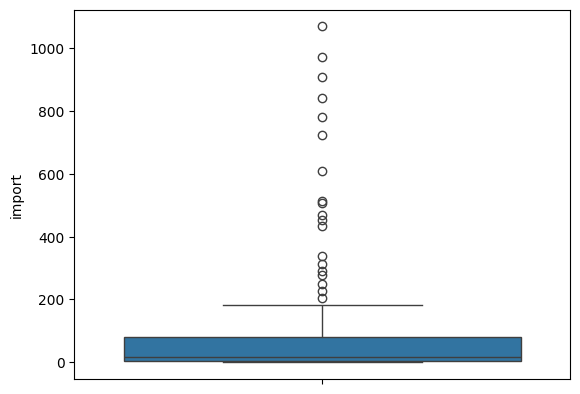

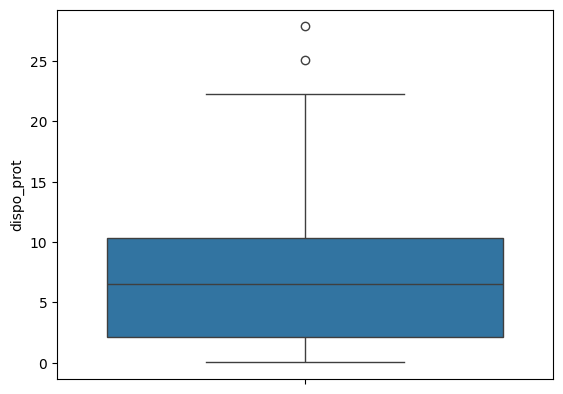

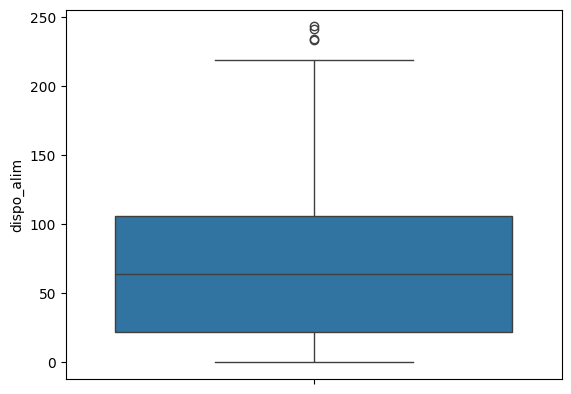

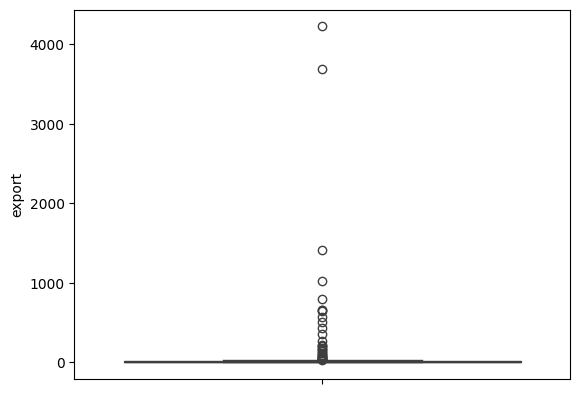

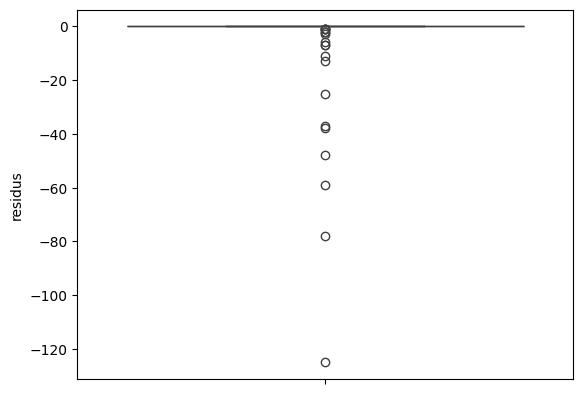

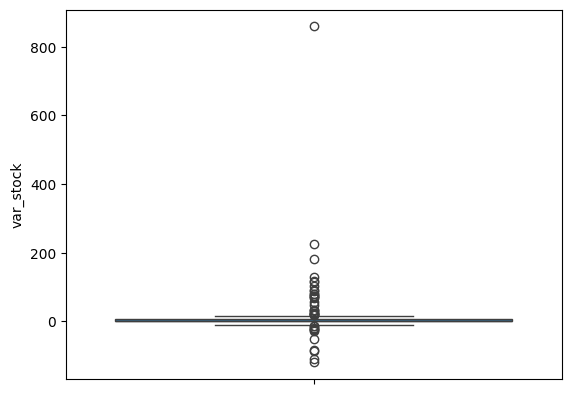

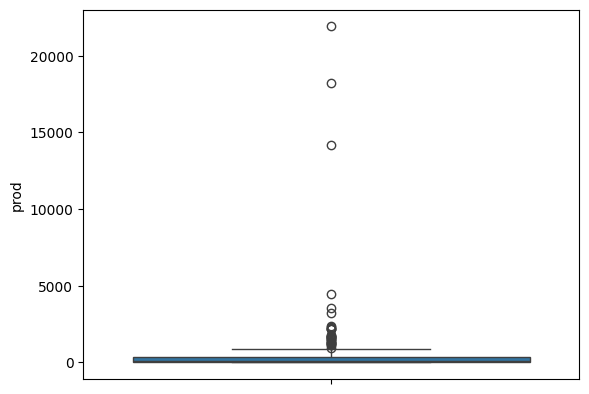

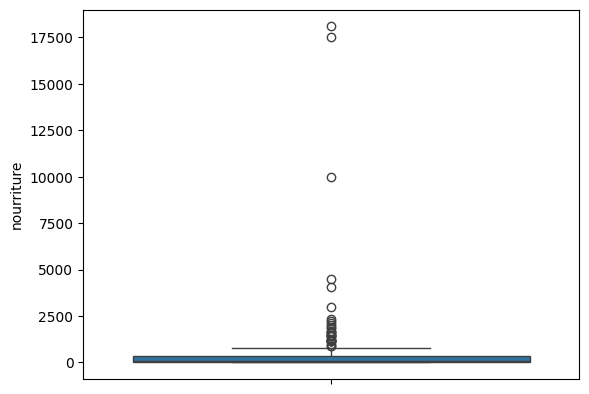

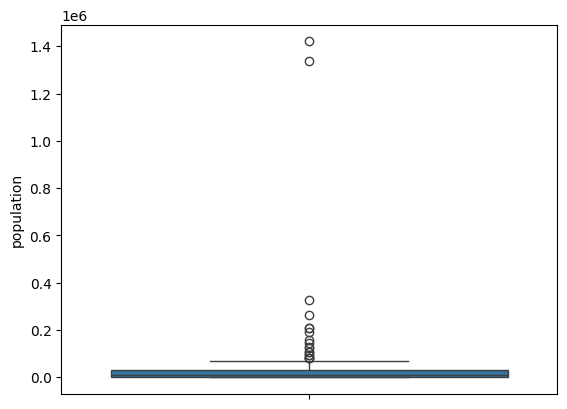

In [44]:
for col in df.select_dtypes(include="number").columns:
    plt.figure()
    sns.boxplot(data=df[col])

Make a pairplot of the numerical columns:

⏲️ This visualization can be slow with large datasets. 

Use ```VIZ = True / False``` to enable / disable the visualization.

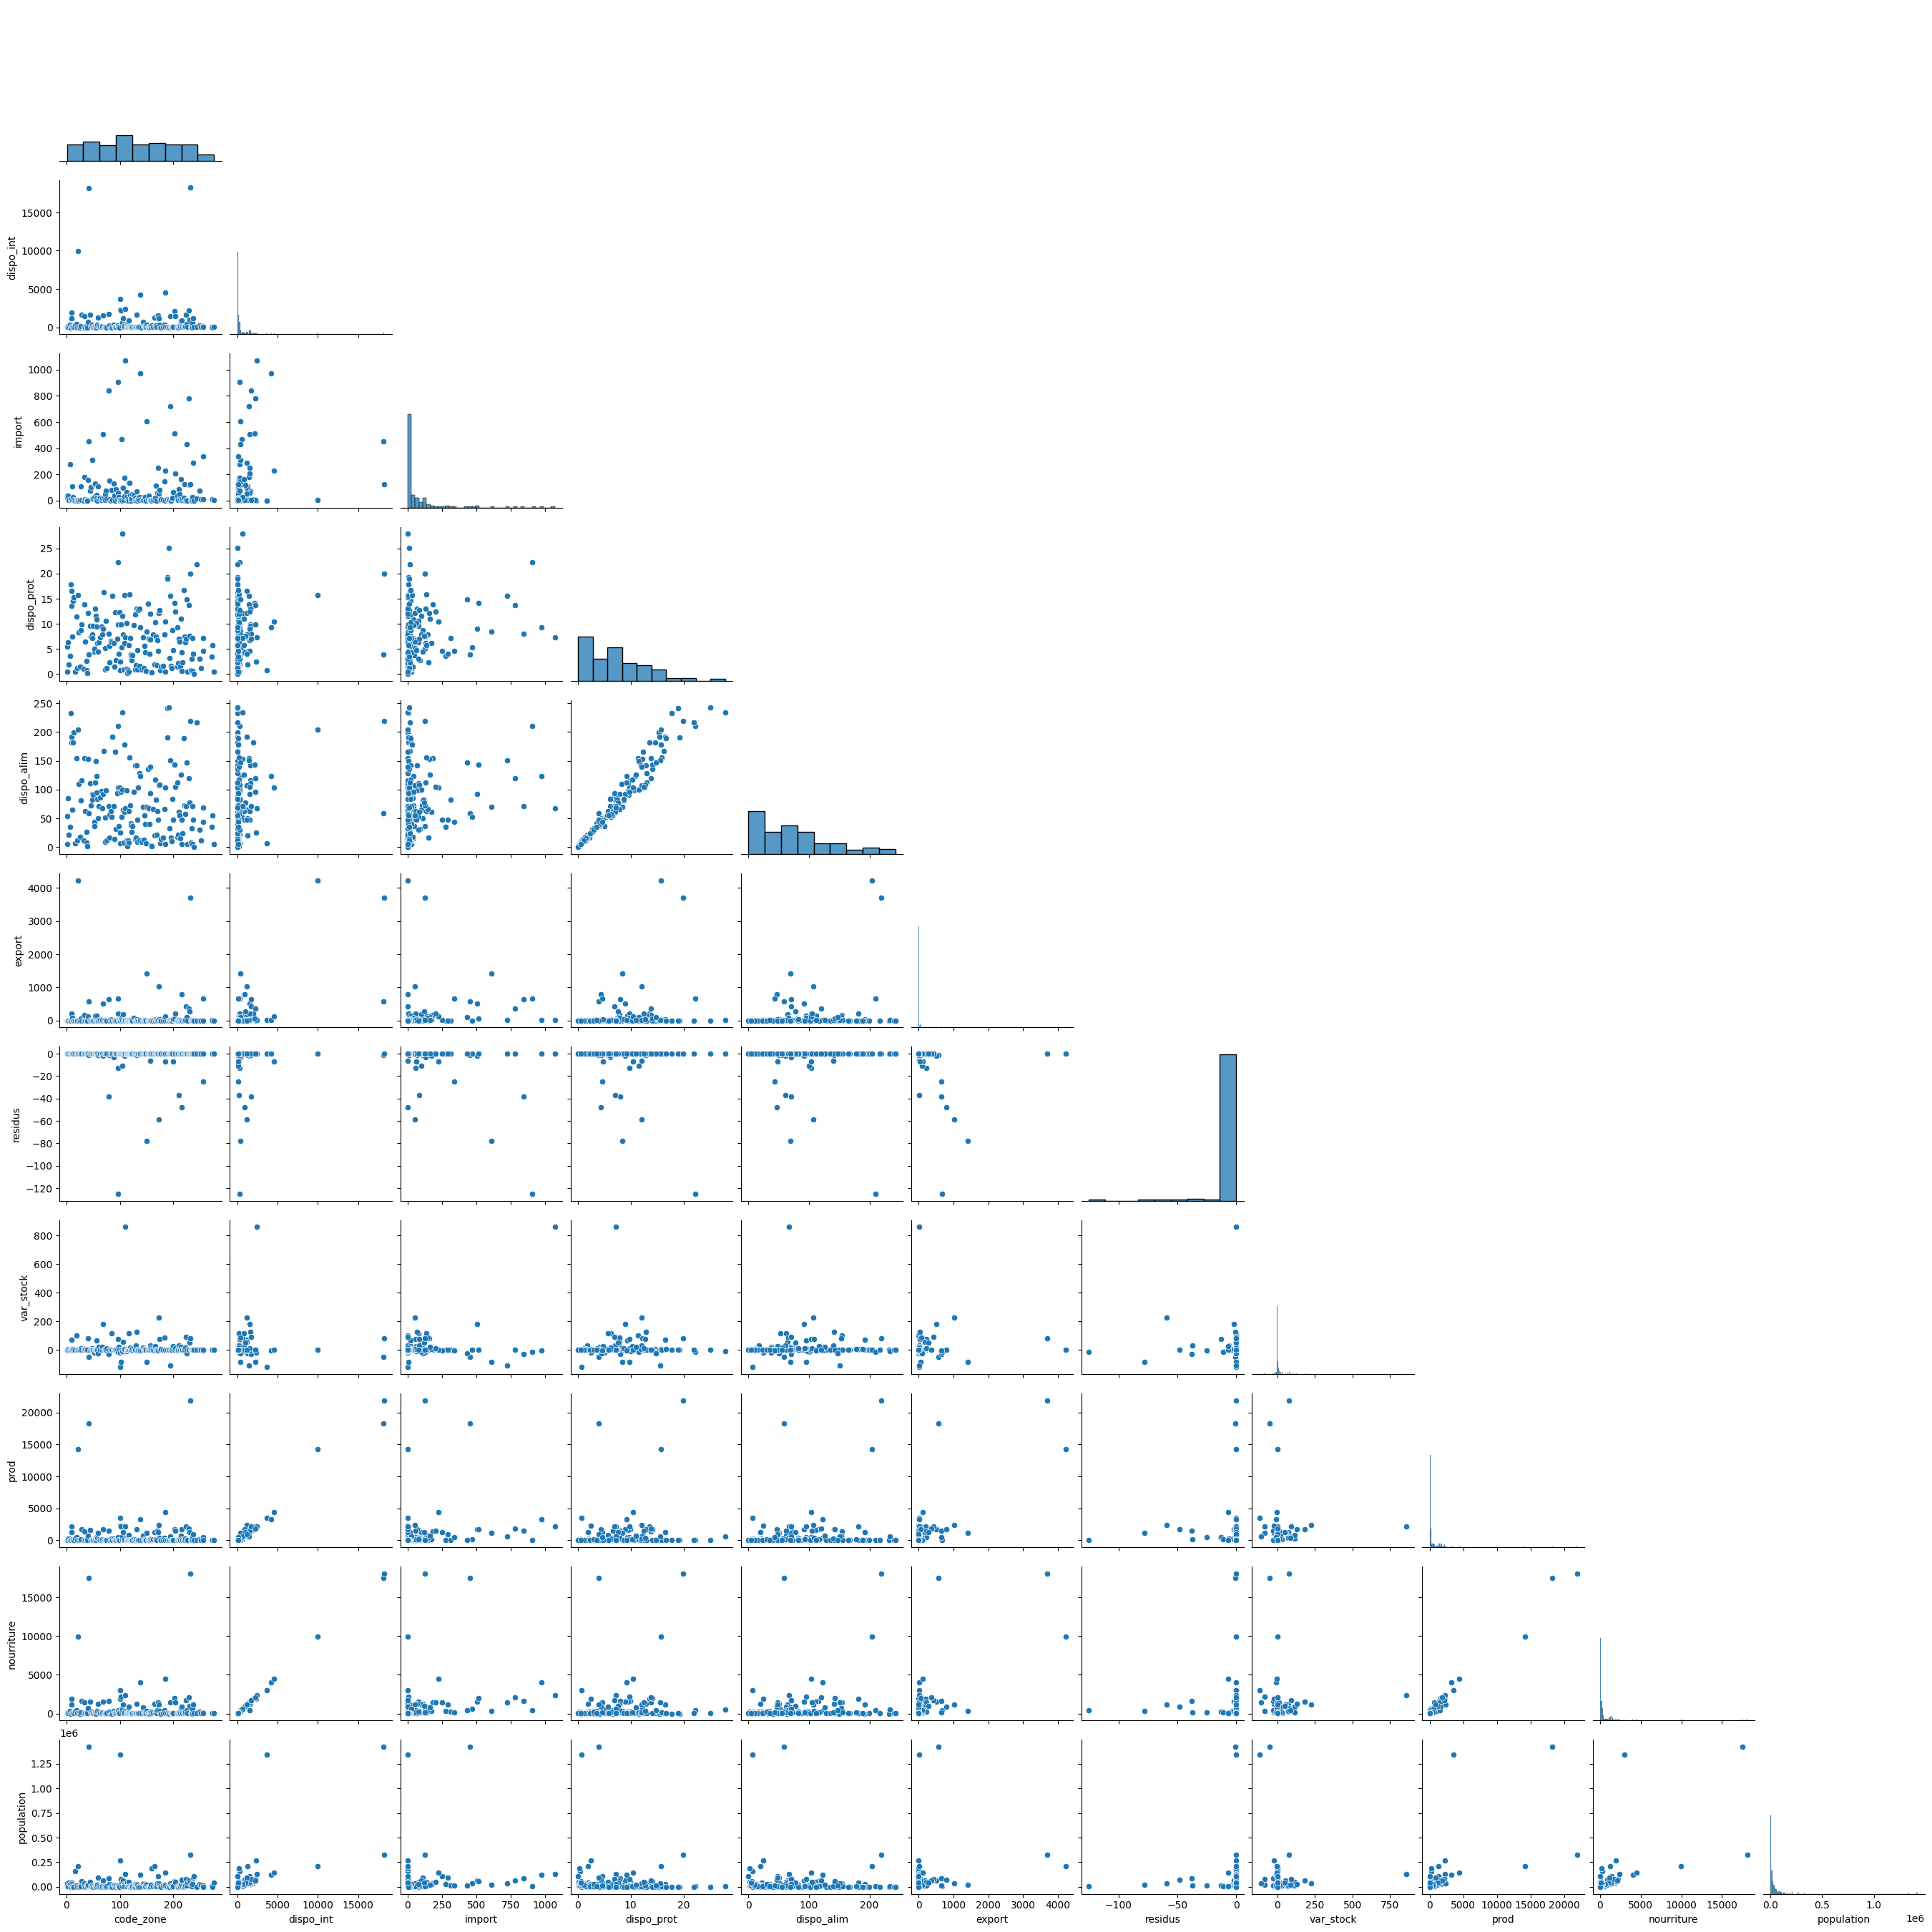

In [45]:
VIZ = True  # Enable this with True
if VIZ:
    sns.pairplot(df.select_dtypes(exclude="object"), corner=True)

## Data Cleaning

### Population

Have a look to small countries : 

In [46]:
df.population.describe().round(0)

count        172.0
mean       42842.0
std       153064.0
min           52.0
25%         2874.0
50%         9758.0
75%        30139.0
max      1421022.0
Name: population, dtype: float64

Update the population with the good number : 

In [47]:
df.population = df.population.astype(int) * 1_000
df.population.describe().round(0)

count    1.720000e+02
mean     4.284126e+07
std      1.530637e+08
min      5.200000e+04
25%      2.874250e+06
50%      9.757000e+06
75%      3.013800e+07
max      1.421021e+09
Name: population, dtype: float64

Sort the dataset by population : 

In [48]:
df.sort_values("population", ascending=False).head()

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
26,41,"Chine, continentale",18161.0,452.0,3.96,59.0,576.0,-1.0,-50.0,18236.0,17518.0,1421021000
65,100,Inde,3661.0,0.0,0.75,7.0,4.0,0.0,-119.0,3545.0,2965.0,1338676000
157,231,États-Unis d'Amérique,18266.0,123.0,19.93,219.0,3692.0,-0.0,80.0,21914.0,18100.0,325084000
66,101,Indonésie,2323.0,1.0,2.42,25.0,0.0,0.0,-21.0,2301.0,1904.0,264650000
114,165,Pakistan,1282.0,2.0,1.97,20.0,4.0,-0.0,-3.0,1281.0,1218.0,207906000


In [49]:
df.sort_values("population", ascending=True).head()

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
128,188,Saint-Kitts-et-Nevis,4.0,4.0,19.22,190.0,0.0,0.0,0.0,0.0,3.0,52000
35,55,Dominique,4.0,4.0,11.52,150.0,0.0,0.0,0.0,0.0,3.0,71000
5,8,Antigua-et-Barbuda,7.0,7.0,17.77,233.0,0.0,0.0,0.0,0.0,5.0,95000
130,191,Saint-Vincent-et-les Grenadines,8.0,9.0,25.10,243.0,0.0,0.0,1.0,0.0,8.0,109000
55,86,Grenade,8.0,7.0,15.50,192.0,0.0,-0.0,-0.0,1.0,5.0,110000


Remember the shape of the dataset

In [50]:
df.shape

(172, 12)

Select only "large" countries +1M : 

In [51]:
threshold = 1000000

Here ```1000000``` is not so easy to read.

With python, we can use the ```_``` special character in order to separate
thousands :  

In [52]:
threshold = 1_000_000

Trying to find rows with pop > threshold : 

In [53]:
df.population > threshold

0       True
1       True
2       True
3       True
4       True
       ...  
167     True
168    False
169     True
170    False
171     True
Name: population, Length: 172, dtype: bool

Creating a tmp (temporary) variable.

In [54]:
indexor = df.population > threshold
indexor

0       True
1       True
2       True
3       True
4       True
       ...  
167     True
168    False
169     True
170    False
171     True
Name: population, Length: 172, dtype: bool

Use this ```bool``` vector (True / False) as a selector : 

In [55]:
df = df.loc[indexor]
df

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
0,1,Arménie,47.0,35.0,5.44,54.0,0.0,0.0,-2.0,11.0,47.0,2944000
1,2,Afghanistan,57.0,29.0,0.54,5.0,0.0,0.0,0.0,28.0,55.0,36296000
2,3,Albanie,47.0,38.0,6.26,85.0,0.0,0.0,4.0,13.0,47.0,2884000
3,4,Algérie,277.0,2.0,1.97,22.0,0.0,0.0,0.0,275.0,264.0,41389000
4,7,Angola,319.0,277.0,3.60,35.0,0.0,0.0,-0.0,42.0,315.0,29816000
...,...,...,...,...,...,...,...,...,...,...,...,...
165,249,Yémen,246.0,78.0,3.04,30.0,0.0,0.0,-0.0,168.0,237.0,27834000
166,251,Zambie,60.0,12.0,1.15,11.0,1.0,0.0,-0.0,49.0,58.0,16853000
167,255,Belgique,152.0,338.0,4.57,44.0,656.0,-25.0,-6.0,463.0,144.0,11419000
169,272,Serbie,90.0,12.0,3.50,35.0,7.0,-0.0,0.0,85.0,90.0,8829000


Of course, you can write all this code in a single line : 

In [56]:
df = df.loc[df.population > 1_000_000]
df

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
0,1,Arménie,47.0,35.0,5.44,54.0,0.0,0.0,-2.0,11.0,47.0,2944000
1,2,Afghanistan,57.0,29.0,0.54,5.0,0.0,0.0,0.0,28.0,55.0,36296000
2,3,Albanie,47.0,38.0,6.26,85.0,0.0,0.0,4.0,13.0,47.0,2884000
3,4,Algérie,277.0,2.0,1.97,22.0,0.0,0.0,0.0,275.0,264.0,41389000
4,7,Angola,319.0,277.0,3.60,35.0,0.0,0.0,-0.0,42.0,315.0,29816000
...,...,...,...,...,...,...,...,...,...,...,...,...
165,249,Yémen,246.0,78.0,3.04,30.0,0.0,0.0,-0.0,168.0,237.0,27834000
166,251,Zambie,60.0,12.0,1.15,11.0,1.0,0.0,-0.0,49.0,58.0,16853000
167,255,Belgique,152.0,338.0,4.57,44.0,656.0,-25.0,-6.0,463.0,144.0,11419000
169,272,Serbie,90.0,12.0,3.50,35.0,7.0,-0.0,0.0,85.0,90.0,8829000


What about our new DataFrame?

In [57]:
df.sort_values("population", ascending=True).head()

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
141,209,Eswatini,7.0,2.0,2.23,22.0,0.0,0.0,0.0,6.0,7.0,1124000
31,50,Chypre,38.0,14.0,9.58,91.0,1.0,-0.0,0.0,25.0,30.0,1179000
123,176,Timor-Leste,5.0,11.0,1.46,14.0,0.0,0.0,7.0,1.0,5.0,1243000
97,137,Maurice,49.0,2.0,13.06,128.0,0.0,-0.0,0.0,48.0,48.0,1264000
41,63,Estonie,29.0,21.0,7.27,86.0,11.0,0.0,2.0,20.0,28.0,1319000


Ok why not, but let's try a new threshold.

Select only "large" countries +5M : 

In [58]:
threshold = 5_000_000
df = df.loc[df.population > threshold]
df

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
1,2,Afghanistan,57.0,29.0,0.54,5.0,0.0,0.0,0.0,28.0,55.0,36296000
3,4,Algérie,277.0,2.0,1.97,22.0,0.0,0.0,0.0,275.0,264.0,41389000
4,7,Angola,319.0,277.0,3.60,35.0,0.0,0.0,-0.0,42.0,315.0,29816000
6,9,Argentine,1962.0,8.0,13.53,182.0,207.0,0.0,0.0,2161.0,1856.0,43937000
7,10,Australie,1171.0,16.0,16.60,192.0,42.0,-0.0,71.0,1269.0,1171.0,24584000
...,...,...,...,...,...,...,...,...,...,...,...,...
165,249,Yémen,246.0,78.0,3.04,30.0,0.0,0.0,-0.0,168.0,237.0,27834000
166,251,Zambie,60.0,12.0,1.15,11.0,1.0,0.0,-0.0,49.0,58.0,16853000
167,255,Belgique,152.0,338.0,4.57,44.0,656.0,-25.0,-6.0,463.0,144.0,11419000
169,272,Serbie,90.0,12.0,3.50,35.0,7.0,-0.0,0.0,85.0,90.0,8829000


In [59]:
df.sort_values("population", ascending=True).head()

,code_zone,zone,dispo_int,import,dispo_prot,dispo_alim,export,residus,var_stock,prod,nourriture,population
28,46,Congo,110.0,104.0,7.45,72.0,0.0,0.0,-0.0,7.0,110.0,5110000
113,162,Norvège,102.0,2.0,7.81,66.0,0.0,0.0,1.0,101.0,101.0,5296000
136,199,Slovaquie,74.0,63.0,4.74,48.0,35.0,-7.0,26.0,71.0,76.0,5447000
43,67,Finlande,111.0,16.0,7.87,68.0,12.0,-0.0,22.0,129.0,103.0,5511000
34,54,Danemark,167.0,133.0,12.97,112.0,139.0,0.0,0.0,173.0,166.0,5732000


What about our correlation matrix : 

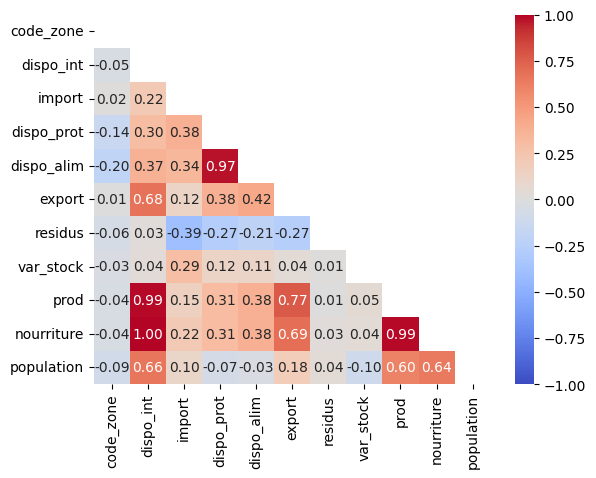

In [60]:
make_corr_heatmap(df)

### Columns

Select only relevant columns:

In [61]:
cols = [
    "code_zone",
    "zone",
    "dispo_int",  # WHY NOT
    "import",
    # "dispo_prot",
    "dispo_alim",
    "export",
    # "residus",
    # "var_stock",
    # "prod",
    # "nourriture",
    "population",
]

cols

['code_zone',
 'zone',
 'dispo_int',
 'import',
 'dispo_alim',
 'export',
 'population']

Make the selection : 

In [62]:
df = df.loc[:, cols]
df

,code_zone,zone,dispo_int,import,dispo_alim,export,population
1,2,Afghanistan,57.0,29.0,5.0,0.0,36296000
3,4,Algérie,277.0,2.0,22.0,0.0,41389000
4,7,Angola,319.0,277.0,35.0,0.0,29816000
6,9,Argentine,1962.0,8.0,182.0,207.0,43937000
7,10,Australie,1171.0,16.0,192.0,42.0,24584000
...,...,...,...,...,...,...,...
165,249,Yémen,246.0,78.0,30.0,0.0,27834000
166,251,Zambie,60.0,12.0,11.0,1.0,16853000
167,255,Belgique,152.0,338.0,44.0,656.0,11419000
169,272,Serbie,90.0,12.0,35.0,7.0,8829000


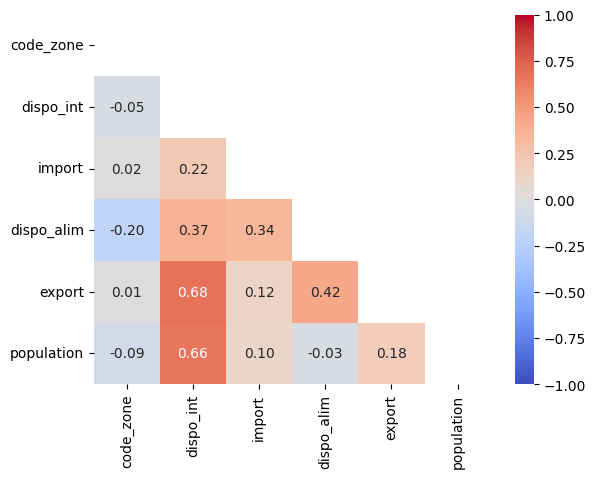

In [63]:
make_corr_heatmap(df)

## Feature engineering

Have a look to our dataset:

In [64]:
df

,code_zone,zone,dispo_int,import,dispo_alim,export,population
1,2,Afghanistan,57.0,29.0,5.0,0.0,36296000
3,4,Algérie,277.0,2.0,22.0,0.0,41389000
4,7,Angola,319.0,277.0,35.0,0.0,29816000
6,9,Argentine,1962.0,8.0,182.0,207.0,43937000
7,10,Australie,1171.0,16.0,192.0,42.0,24584000
...,...,...,...,...,...,...,...
165,249,Yémen,246.0,78.0,30.0,0.0,27834000
166,251,Zambie,60.0,12.0,11.0,1.0,16853000
167,255,Belgique,152.0,338.0,44.0,656.0,11419000
169,272,Serbie,90.0,12.0,35.0,7.0,8829000


### Dependency

Create a new column with some kind of "depedency" :

In [65]:
df["dependency"] = df["import"] / df["dispo_int"]
df

,code_zone,zone,dispo_int,import,dispo_alim,export,population,dependency
1,2,Afghanistan,57.0,29.0,5.0,0.0,36296000,0.508772
3,4,Algérie,277.0,2.0,22.0,0.0,41389000,0.007220
4,7,Angola,319.0,277.0,35.0,0.0,29816000,0.868339
6,9,Argentine,1962.0,8.0,182.0,207.0,43937000,0.004077
7,10,Australie,1171.0,16.0,192.0,42.0,24584000,0.013664
...,...,...,...,...,...,...,...,...
165,249,Yémen,246.0,78.0,30.0,0.0,27834000,0.317073
166,251,Zambie,60.0,12.0,11.0,1.0,16853000,0.200000
167,255,Belgique,152.0,338.0,44.0,656.0,11419000,2.223684
169,272,Serbie,90.0,12.0,35.0,7.0,8829000,0.133333


Sort the dataframe by dependency : 

In [66]:
df.sort_values("dependency", ascending=False).head()

,code_zone,zone,dispo_int,import,dispo_alim,export,population,dependency
61,96,Chine - RAS de Hong-Kong,280.0,907.0,210.0,663.0,7306000,3.239286
167,255,Belgique,152.0,338.0,44.0,656.0,11419000,2.223684
105,150,Pays-Bas,372.0,608.0,70.0,1418.0,17021000,1.634409
153,225,Émirats arabes unis,412.0,433.0,147.0,94.0,9487000,1.050971
140,208,Tadjikistan,40.0,38.0,18.0,0.0,8880000,0.950000


In [67]:
df.sort_values("dependency", ascending=True).head()

,code_zone,zone,dispo_int,import,dispo_alim,export,population,dependency
78,114,Kenya,35.0,0.0,2.0,0.0,50221000,0.0
133,195,Sénégal,77.0,0.0,16.0,0.0,15419000,0.0
104,149,Népal,58.0,0.0,7.0,0.0,27632000,0.0
70,105,Israël,636.0,0.0,234.0,3.0,8243000,0.0
38,58,Équateur,341.0,0.0,83.0,0.0,16785000,0.0


If we have any country with a ```0``` value for ```dispo_int```` ? 

So we need to clean ```0``` values for ```dispo_int```.

Drop columns with infini values:

In [68]:
df = df.loc[df.dispo_int > 0]
df.sort_values("dispo_int", ascending=True).head()

,code_zone,zone,dispo_int,import,dispo_alim,export,population,dependency
24,39,Tchad,7.0,1.0,2.0,0.0,15016000,0.142857
163,238,Éthiopie,14.0,1.0,0.0,0.0,106399000,0.071429
126,184,Rwanda,19.0,0.0,5.0,0.0,11980000,0.000000
111,158,Niger,21.0,3.0,3.0,0.0,21602000,0.142857
144,213,Turkménistan,27.0,9.0,15.0,0.0,5757000,0.333333


Drop useless columns if needed : 

df = df.drop(columns=["code_zone"], errors="ignore")
df

### Delta

Compute diffrence between columns Import and Export : 

In [69]:
# Compute Import - Export
# Create new column name delta

df["delta"] = df["import"] - df["export"]
df

/tmp/ipykernel_388228/3946313762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["delta"] = df["import"] - df["export"]


,code_zone,zone,dispo_int,import,dispo_alim,export,population,dependency,delta
1,2,Afghanistan,57.0,29.0,5.0,0.0,36296000,0.508772,29.0
3,4,Algérie,277.0,2.0,22.0,0.0,41389000,0.007220,2.0
4,7,Angola,319.0,277.0,35.0,0.0,29816000,0.868339,277.0
6,9,Argentine,1962.0,8.0,182.0,207.0,43937000,0.004077,-199.0
7,10,Australie,1171.0,16.0,192.0,42.0,24584000,0.013664,-26.0
...,...,...,...,...,...,...,...,...,...
165,249,Yémen,246.0,78.0,30.0,0.0,27834000,0.317073,78.0
166,251,Zambie,60.0,12.0,11.0,1.0,16853000,0.200000,11.0
167,255,Belgique,152.0,338.0,44.0,656.0,11419000,2.223684,-318.0
169,272,Serbie,90.0,12.0,35.0,7.0,8829000,0.133333,5.0


Display the correlation matrix : 

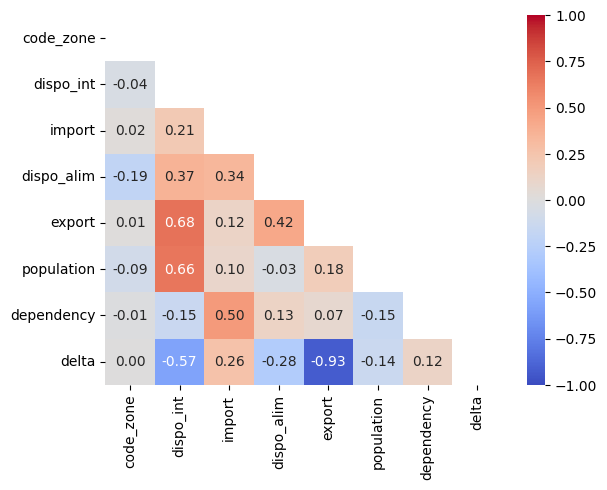

In [70]:
make_corr_heatmap(df)

Export is no more needed :

In [71]:
df.drop(columns="export", inplace=True, errors="ignore")

/tmp/ipykernel_388228/152559177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="export", inplace=True, errors="ignore")


Last print of our df : 

In [72]:
# Last print of our df

df

,code_zone,zone,dispo_int,import,dispo_alim,population,dependency,delta
1,2,Afghanistan,57.0,29.0,5.0,36296000,0.508772,29.0
3,4,Algérie,277.0,2.0,22.0,41389000,0.007220,2.0
4,7,Angola,319.0,277.0,35.0,29816000,0.868339,277.0
6,9,Argentine,1962.0,8.0,182.0,43937000,0.004077,-199.0
7,10,Australie,1171.0,16.0,192.0,24584000,0.013664,-26.0
...,...,...,...,...,...,...,...,...
165,249,Yémen,246.0,78.0,30.0,27834000,0.317073,78.0
166,251,Zambie,60.0,12.0,11.0,16853000,0.200000,11.0
167,255,Belgique,152.0,338.0,44.0,11419000,2.223684,-318.0
169,272,Serbie,90.0,12.0,35.0,8829000,0.133333,5.0


### Scale

We need to standardize our dataset, ie transform it to have 0.0 as mean
and 1.0 as std

In [73]:
df

,code_zone,zone,dispo_int,import,dispo_alim,population,dependency,delta
1,2,Afghanistan,57.0,29.0,5.0,36296000,0.508772,29.0
3,4,Algérie,277.0,2.0,22.0,41389000,0.007220,2.0
4,7,Angola,319.0,277.0,35.0,29816000,0.868339,277.0
6,9,Argentine,1962.0,8.0,182.0,43937000,0.004077,-199.0
7,10,Australie,1171.0,16.0,192.0,24584000,0.013664,-26.0
...,...,...,...,...,...,...,...,...
165,249,Yémen,246.0,78.0,30.0,27834000,0.317073,78.0
166,251,Zambie,60.0,12.0,11.0,16853000,0.200000,11.0
167,255,Belgique,152.0,338.0,44.0,11419000,2.223684,-318.0
169,272,Serbie,90.0,12.0,35.0,8829000,0.133333,5.0


Select only numerical columns:

:warning:**Using ```X``` here is a very strong convention applied by any data analyst, scientist etc.**

In [74]:
X = df.select_dtypes(include="number")
X

,code_zone,dispo_int,import,dispo_alim,population,dependency,delta
1,2,57.0,29.0,5.0,36296000,0.508772,29.0
3,4,277.0,2.0,22.0,41389000,0.007220,2.0
4,7,319.0,277.0,35.0,29816000,0.868339,277.0
6,9,1962.0,8.0,182.0,43937000,0.004077,-199.0
7,10,1171.0,16.0,192.0,24584000,0.013664,-26.0
...,...,...,...,...,...,...,...
165,249,246.0,78.0,30.0,27834000,0.317073,78.0
166,251,60.0,12.0,11.0,16853000,0.200000,11.0
167,255,152.0,338.0,44.0,11419000,2.223684,-318.0
169,272,90.0,12.0,35.0,8829000,0.133333,5.0


Init a ```scaler``` object from the ```StandardScaler``` class of scikit-learn : 

In [75]:
scaler = StandardScaler()
scaler

StandardScaler()

Fit this object, ie *precompute* the transformations

In [76]:
scaler.fit(X)

StandardScaler()

Finally, do transform our dataset:

In [77]:
X_scaled = scaler.transform(X)
X_scaled

array([[-1.72381588e+00, -3.74105331e-01, -4.44496163e-01,
        -1.09533999e+00, -1.59395036e-01,  4.66401926e-01,
         1.06225317e-01],
       [-1.69691211e+00, -2.91244176e-01, -5.65846090e-01,
        -7.83850578e-01, -1.32269415e-01, -6.22814294e-01,
         5.98698737e-02],
       [-1.65655646e+00, -2.75425228e-01,  6.70125384e-01,
        -5.45652793e-01, -1.93907902e-01,  1.24727017e+00,
         5.32008643e-01],
       [-1.62965269e+00,  3.43396946e-01, -5.38879439e-01,
         2.14781446e+00, -1.18698615e-01, -6.29639369e-01,
        -2.85220645e-01],
       [-1.61620080e+00,  4.54734280e-02, -5.02923906e-01,
         2.33104353e+00, -2.21773846e-01, -6.08821385e-01,
         1.17975626e-02],
       [-1.60274892e+00, -3.30414904e-01, -8.04463835e-02,
         4.03440143e-03, -3.05739175e-01,  7.42350716e-01,
         1.11375921e-01],
       [-1.53548949e+00, -3.01413499e-01, -5.74834973e-01,
        -1.05869417e+00,  4.97782125e-01, -6.38494386e-01,
         5.6436137

**Please not that we can perform fit and transform in the same operation**

In [78]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.72381588e+00, -3.74105331e-01, -4.44496163e-01,
        -1.09533999e+00, -1.59395036e-01,  4.66401926e-01,
         1.06225317e-01],
       [-1.69691211e+00, -2.91244176e-01, -5.65846090e-01,
        -7.83850578e-01, -1.32269415e-01, -6.22814294e-01,
         5.98698737e-02],
       [-1.65655646e+00, -2.75425228e-01,  6.70125384e-01,
        -5.45652793e-01, -1.93907902e-01,  1.24727017e+00,
         5.32008643e-01],
       [-1.62965269e+00,  3.43396946e-01, -5.38879439e-01,
         2.14781446e+00, -1.18698615e-01, -6.29639369e-01,
        -2.85220645e-01],
       [-1.61620080e+00,  4.54734280e-02, -5.02923906e-01,
         2.33104353e+00, -2.21773846e-01, -6.08821385e-01,
         1.17975626e-02],
       [-1.60274892e+00, -3.30414904e-01, -8.04463835e-02,
         4.03440143e-03, -3.05739175e-01,  7.42350716e-01,
         1.11375921e-01],
       [-1.53548949e+00, -3.01413499e-01, -5.74834973e-01,
        -1.05869417e+00,  4.97782125e-01, -6.38494386e-01,
         5.6436137

As usual... not so easy to read. 

The have a ```np.ndarray``` oject, and the output is pretty uggly.

📢 We can use the ```type``` function of python to have an idea of the data type of ```X_scaled```

In [79]:
type(X_scaled)

numpy.ndarray

Rebuild a DataFrame with the scaled data:

In [80]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,code_zone,dispo_int,import,dispo_alim,population,dependency,delta
0,-1.723816,-0.374105,-0.444496,-1.095340,-0.159395,0.466402,0.106225
1,-1.696912,-0.291244,-0.565846,-0.783851,-0.132269,-0.622814,0.059870
2,-1.656556,-0.275425,0.670125,-0.545653,-0.193908,1.247270,0.532009
3,-1.629653,0.343397,-0.538879,2.147814,-0.118699,-0.629639,-0.285221
4,-1.616201,0.045473,-0.502924,2.331044,-0.221774,-0.608821,0.011798


Check that data were scaled:

In [81]:
X_scaled.describe().round(1)

,code_zone,dispo_int,import,dispo_alim,population,dependency,delta
count,109.0,109.0,109.0,109.0,109.0,109.0,109.0
mean,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.7,-0.4,-0.6,-1.2,-0.3,-0.6,-7.2
25%,-0.9,-0.4,-0.6,-0.9,-0.3,-0.6,0.1
50%,-0.1,-0.3,-0.5,-0.1,-0.2,-0.3,0.1
75%,0.9,0.0,0.0,0.6,-0.1,0.2,0.2
max,2.0,6.5,4.2,3.1,7.2,6.4,1.9


Of course you can compute this transformation manually:

In [82]:
X_scaled = (X - X.mean()) / X.std()
X_scaled.head()

,code_zone,dispo_int,import,dispo_alim,population,dependency,delta
1,-1.71589,-0.372385,-0.442452,-1.090304,-0.158662,0.464258,0.105737
3,-1.68911,-0.289905,-0.563244,-0.780247,-0.131661,-0.619951,0.059595
4,-1.64894,-0.274159,0.667044,-0.543144,-0.193016,1.241536,0.529563
6,-1.62216,0.341818,-0.536402,2.137939,-0.118153,-0.626744,-0.283909
7,-1.60877,0.045264,-0.500612,2.320326,-0.220754,-0.606022,0.011743


😇 Ok, this implementation is better ! 

But we have used a ```StandardScaler``` for educational purpose : regarding OOP, regarding how to manage a scikit-learn object etc.

In [83]:
X_scaled.describe().round(2)

,code_zone,dispo_int,import,dispo_alim,population,dependency,delta
count,109.00,109.00,109.00,109.00,109.00,109.00,109.00
mean,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.72,-0.39,-0.57,-1.18,-0.32,-0.64,-7.16
25%,-0.94,-0.36,-0.56,-0.89,-0.30,-0.62,0.06
50%,-0.12,-0.30,-0.45,-0.11,-0.24,-0.35,0.07
75%,0.90,0.05,0.00,0.55,-0.09,0.19,0.16
max,1.95,6.45,4.21,3.09,7.18,6.37,1.87


## Principal Component Analysis

### Init and fit

Initialize a PCA : 

In [84]:
pca = PCA(n_components=6)
pca

PCA(n_components=6)

Fit : 

In [85]:
pca.fit(X_scaled)

PCA(n_components=6)

Here is our new dataset : 

In [86]:
X_proj = pca.transform(X_scaled)
X_proj

array([[-6.45832893e-01, -2.33997540e-01, -3.66857459e-01,
        -1.54566695e+00,  1.21613887e+00,  4.65431055e-01],
       [-3.57427506e-01, -8.69123462e-01, -5.27482639e-01,
        -1.62337273e+00,  3.56598040e-01,  5.86858644e-01],
       [-5.55048174e-01,  1.26311444e+00, -1.62364424e-01,
        -1.45264803e+00,  1.04537032e+00,  4.78728563e-01],
       [ 1.24104913e+00,  9.88018981e-02, -1.99624454e+00,
        -1.13537242e+00, -9.20399894e-01, -6.43095457e-01],
       [ 9.31574066e-01,  2.79444926e-01, -2.06692205e+00,
        -1.20377720e+00, -1.14014178e+00, -8.19920121e-01],
       [-3.00054104e-01,  5.68969564e-01, -8.52523218e-01,
        -1.25464964e+00,  7.58864076e-01,  8.45185594e-02],
       [-1.90826509e-01, -1.05301303e+00,  3.30326735e-02,
        -1.69714752e+00,  5.21836454e-01,  4.09969133e-01],
       [ 4.40773138e-01, -1.20011152e-02, -1.76335625e+00,
        -1.18009008e+00, -8.67340072e-01, -5.77707586e-01],
       [ 6.84433942e+00, -1.48549891e+00, -3.804

**Here, ```X_proj``` is a strong convention**

Same problem than with X_scaled : Not so easy to read.

Same problem ? Same solution! 

Use pandas to create a DataFrame : 

In [87]:
# About the columns names

cols = [
    "PC1",
    "PC2",
    "PC3",
    "PC4",
    "PC5",
    "PC6",
]

In [88]:
# Out new X_proj :

X_proj = pd.DataFrame(X_proj, columns=cols)
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.645833,-0.233998,-0.366857,-1.545667,1.216139,0.465431
1,-0.357428,-0.869123,-0.527483,-1.623373,0.356598,0.586859
2,-0.555048,1.263114,-0.162364,-1.452648,1.045370,0.478729
3,1.241049,0.098802,-1.996245,-1.135372,-0.920400,-0.643095
4,0.931574,0.279445,-2.066922,-1.203777,-1.140142,-0.819920
...,...,...,...,...,...,...
104,-0.814924,-0.403053,0.803164,1.285350,-0.020464,-0.166259
105,-0.968772,-0.898419,0.822121,1.292527,0.073615,-0.043518
106,-0.768630,2.778851,0.675635,2.215061,2.730068,-0.714156
107,-0.840006,-0.848175,0.686704,1.572962,-0.291266,-0.250338


Please note that a better implementation of our columns list is possible : 

In [89]:
cols = [f"PC{i}" for i in range(1, pca.n_components_ + 1)]
cols

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

### Analyse the components

Our components : 

In [90]:
pcs = pca.components_
pcs

array([[-0.11626761,  0.65000054,  0.11615618,  0.35266751,  0.45643381,
        -0.10075639, -0.45566526],
       [-0.07653884, -0.00687889,  0.66668307,  0.35794763, -0.09187686,
         0.59930391,  0.23215323],
       [ 0.39943568,  0.16109759,  0.27154232, -0.50714217,  0.57857973,
        -0.00701787,  0.38570264],
       [ 0.86219944,  0.06863823,  0.02319022,  0.09025368, -0.29652049,
         0.1298651 , -0.37205923],
       [-0.19298782, -0.00742816, -0.22670319, -0.47875525,  0.11573051,
         0.69688562, -0.427851  ],
       [-0.20091325,  0.21767482,  0.55058516, -0.49866312, -0.44574151,
        -0.30425239, -0.26303537]])

Using a data Frame  : 

In [91]:
components = pd.DataFrame(pcs, columns=X.columns, index=cols)
components

,code_zone,dispo_int,import,dispo_alim,population,dependency,delta
PC1,-0.116268,0.650001,0.116156,0.352668,0.456434,-0.100756,-0.455665
PC2,-0.076539,-0.006879,0.666683,0.357948,-0.091877,0.599304,0.232153
PC3,0.399436,0.161098,0.271542,-0.507142,0.578580,-0.007018,0.385703
PC4,0.862199,0.068638,0.023190,0.090254,-0.296520,0.129865,-0.372059
PC5,-0.192988,-0.007428,-0.226703,-0.478755,0.115731,0.696886,-0.427851
PC6,-0.200913,0.217675,0.550585,-0.498663,-0.445742,-0.304252,-0.263035


Recompute the first value : 

In [92]:
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.645833,-0.233998,-0.366857,-1.545667,1.216139,0.465431
1,-0.357428,-0.869123,-0.527483,-1.623373,0.356598,0.586859
2,-0.555048,1.263114,-0.162364,-1.452648,1.045370,0.478729
3,1.241049,0.098802,-1.996245,-1.135372,-0.920400,-0.643095
4,0.931574,0.279445,-2.066922,-1.203777,-1.140142,-0.819920
...,...,...,...,...,...,...
104,-0.814924,-0.403053,0.803164,1.285350,-0.020464,-0.166259
105,-0.968772,-0.898419,0.822121,1.292527,0.073615,-0.043518
106,-0.768630,2.778851,0.675635,2.215061,2.730068,-0.714156
107,-0.840006,-0.848175,0.686704,1.572962,-0.291266,-0.250338


In [93]:
value = X_proj.iloc[0, 0]
value

-0.6458328926316532

1st line of X_scaled

In [94]:
X_scaled.head(1)

,code_zone,dispo_int,import,dispo_alim,population,dependency,delta
1,-1.71589,-0.372385,-0.442452,-1.090304,-0.158662,0.464258,0.105737


Compute our value : 

In [95]:
(
    (-0.3724 * 0.66)
    + (-0.4424 * 0.11)
    + (-1.090 * 0.34)
    + (-0.1587 * 0.46)
    + (0.4643 * -0.1)
    + (0.1057 * -0.46)
)

-0.8331020000000001

```0.66```, ```0.11``` ... come from our components : 

In [96]:
components

,code_zone,dispo_int,import,dispo_alim,population,dependency,delta
PC1,-0.116268,0.650001,0.116156,0.352668,0.456434,-0.100756,-0.455665
PC2,-0.076539,-0.006879,0.666683,0.357948,-0.091877,0.599304,0.232153
PC3,0.399436,0.161098,0.271542,-0.507142,0.578580,-0.007018,0.385703
PC4,0.862199,0.068638,0.023190,0.090254,-0.296520,0.129865,-0.372059
PC5,-0.192988,-0.007428,-0.226703,-0.478755,0.115731,0.696886,-0.427851
PC6,-0.200913,0.217675,0.550585,-0.498663,-0.445742,-0.304252,-0.263035


Insead of using an uggly sum, we can use just one line of code : 

In [97]:
sum([i * j for i, j in zip(pcs[0], X_scaled.iloc[0])])

-0.6458328926316533

Just transpose this dataframe (Swap columns and rows for better readability) : 

In [98]:
components = components.T
components

,PC1,PC2,PC3,PC4,PC5,PC6
code_zone,-0.116268,-0.076539,0.399436,0.862199,-0.192988,-0.200913
dispo_int,0.650001,-0.006879,0.161098,0.068638,-0.007428,0.217675
import,0.116156,0.666683,0.271542,0.023190,-0.226703,0.550585
dispo_alim,0.352668,0.357948,-0.507142,0.090254,-0.478755,-0.498663
population,0.456434,-0.091877,0.578580,-0.296520,0.115731,-0.445742
dependency,-0.100756,0.599304,-0.007018,0.129865,0.696886,-0.304252
delta,-0.455665,0.232153,0.385703,-0.372059,-0.427851,-0.263035


Add a Heatmap :

<Axes: >

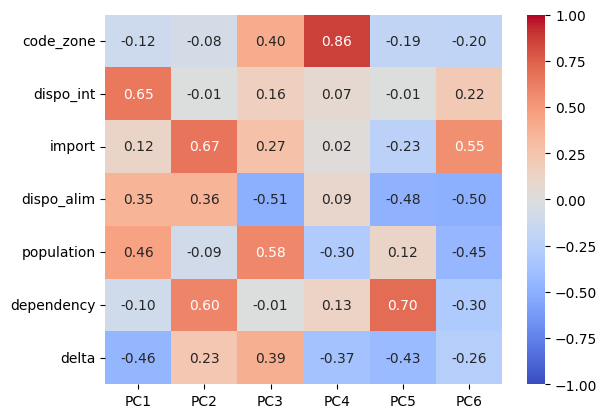

In [99]:
sns.heatmap(components, cmap="coolwarm", vmax=1, vmin=-1, annot=True, fmt=".2f")

### Plot explained variance

The explained variance ratio is pre-computed by scikit-learn : 

In [100]:
pca.explained_variance_ratio_

array([0.3048821 , 0.24301236, 0.15844998, 0.14375043, 0.09413801,
       0.04117369])

We can plot it : 

<Axes: xlabel='None'>

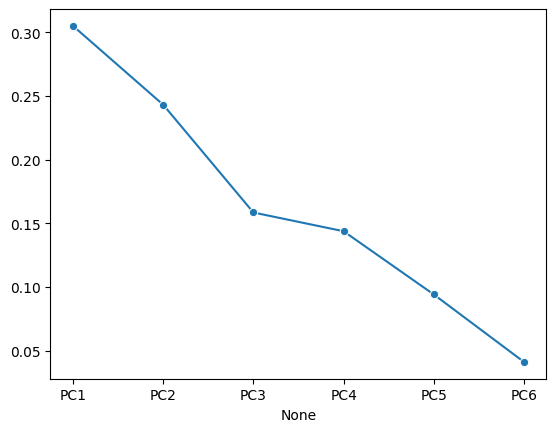

In [101]:
sns.lineplot(y=pca.explained_variance_ratio_, x=components.columns, marker="o")

A better feature here is the cumulative variance : 

In [102]:
cum_var = pca.explained_variance_ratio_.cumsum()
cum_var

array([0.3048821 , 0.54789446, 0.70634444, 0.85009488, 0.94423288,
       0.98540657])

We can plot it : 

<Axes: >

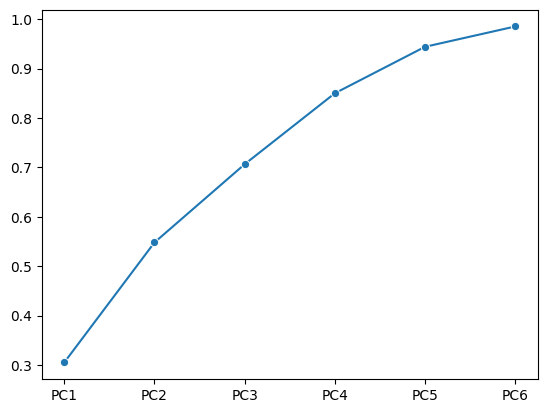

In [103]:
x = components.columns.tolist()
y = cum_var.tolist()
sns.lineplot(y=y, x=x, marker="o")

Just add ```PC0``` with a fake ```0``` value to improve our visualization : 

<Axes: >

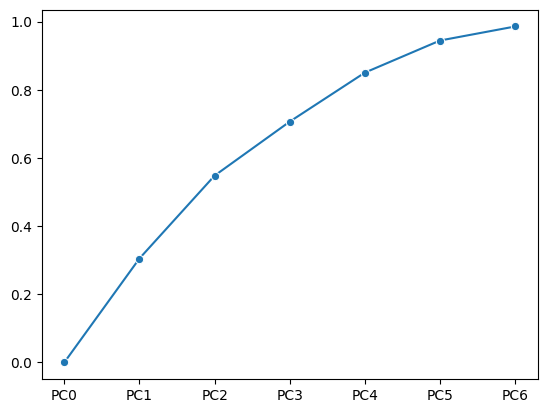

In [104]:
x = ["PC0"] + components.columns.tolist()
y = [0] + cum_var.tolist()
sns.lineplot(y=y, x=x, marker="o")

### Correlation graph

In [105]:
def correlation_graph(
    X_scaled,
    pca,
    dim: list = [0, 1],
):
    """Display the correlation graph for a PCA

    Positional arguments :
        - X_scaled : DataFrame | np.array : the scaled dataset
        - pca : PCA : a PCA instance already fitted

    Optional arguments :
        - dim : list or tuple : values x,y for the dimensions (PC) to plot.
            default :  [0,1] stands for F1, F2"""

    # Extract x et y
    x, y = dim

    # Features
    features = X_scaled.columns

    # Fig size (inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # For each component :
    for i in range(0, pca.components_.shape[1]):
        # Les flèches
        ax.arrow(
            0,
            0,
            pca.components_[x, i],
            pca.components_[y, i],
            head_width=0.07,
            head_length=0.07,
            width=0.02,
        )

        # Labels
        plt.text(
            pca.components_[x, i] + 0.05,
            pca.components_[y, i] + 0.05,
            features[i],
        )

    # Display horizontal and vertical lines
    plt.plot([-1, 1], [0, 0], color="grey", ls="--")
    plt.plot([0, 0], [-1, 1], color="grey", ls="--")

    # Axes names with % of inertia
    plt.xlabel(
        "F{} ({}%)".format(x + 1, round(100 * pca.explained_variance_ratio_[x], 1))
    )
    plt.ylabel(
        "F{} ({}%)".format(y + 1, round(100 * pca.explained_variance_ratio_[y], 1))
    )

    # Title
    plt.title("Cercle des corrélations (F{} et F{})".format(x + 1, y + 1))

    # Draw the circle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes and final display
    plt.axis("equal")
    plt.show(block=False)

Plot a first correlation graph (PC1 v PC2) : 

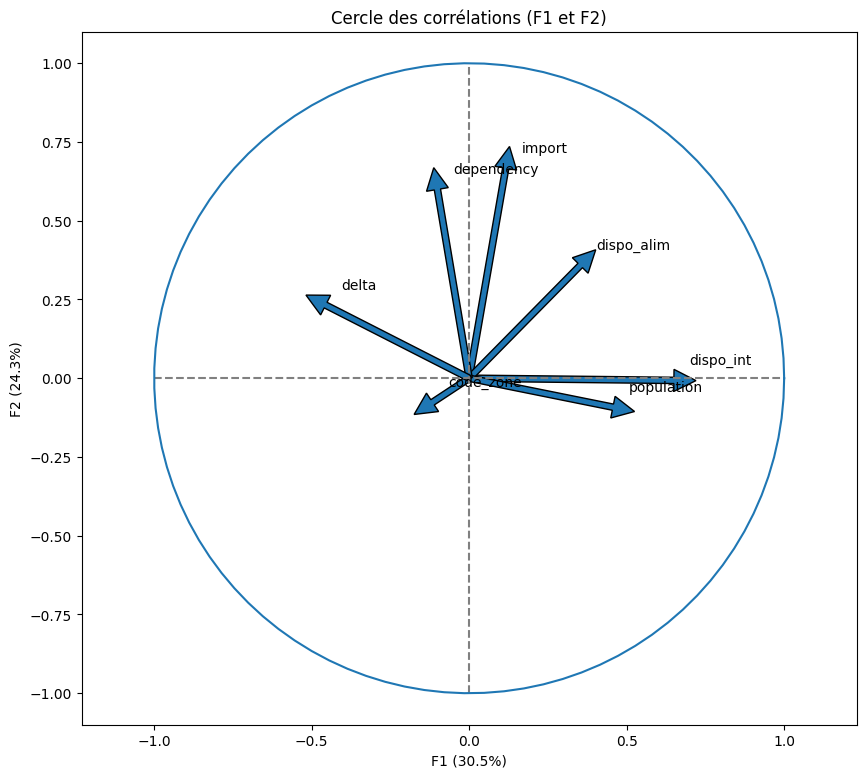

In [106]:
correlation_graph(
    X_scaled,
    pca,
    dim=[0, 1],
)

Plot a 2nd correlation graph (PC2 v PC3)

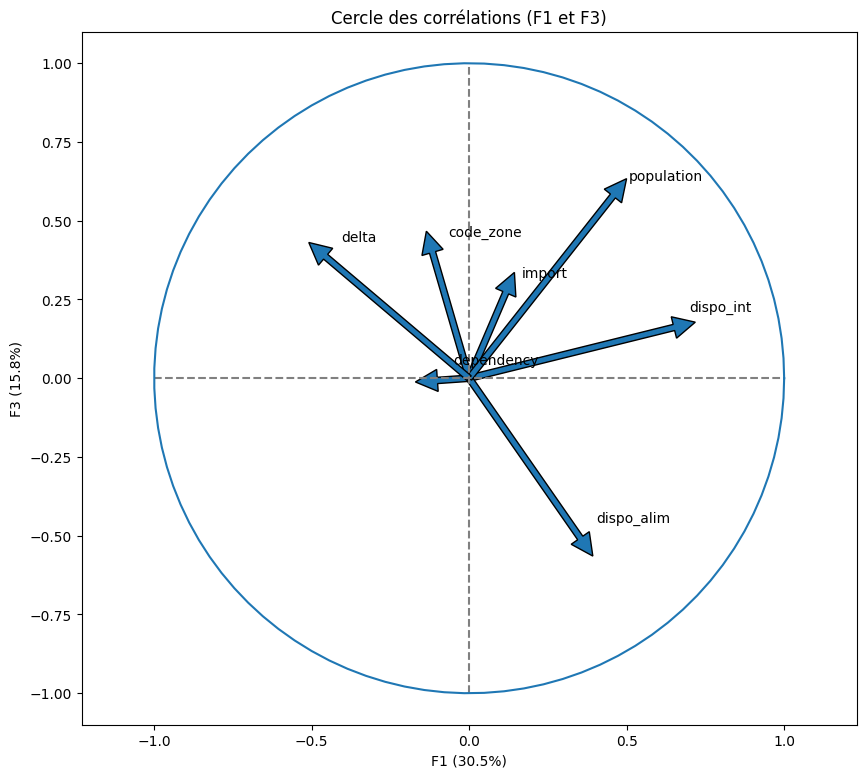

In [107]:
correlation_graph(
    X_scaled,
    pca,
    dim=[0, 2],
)

Plot a 2nd correlation graph (PC1 v PC3)

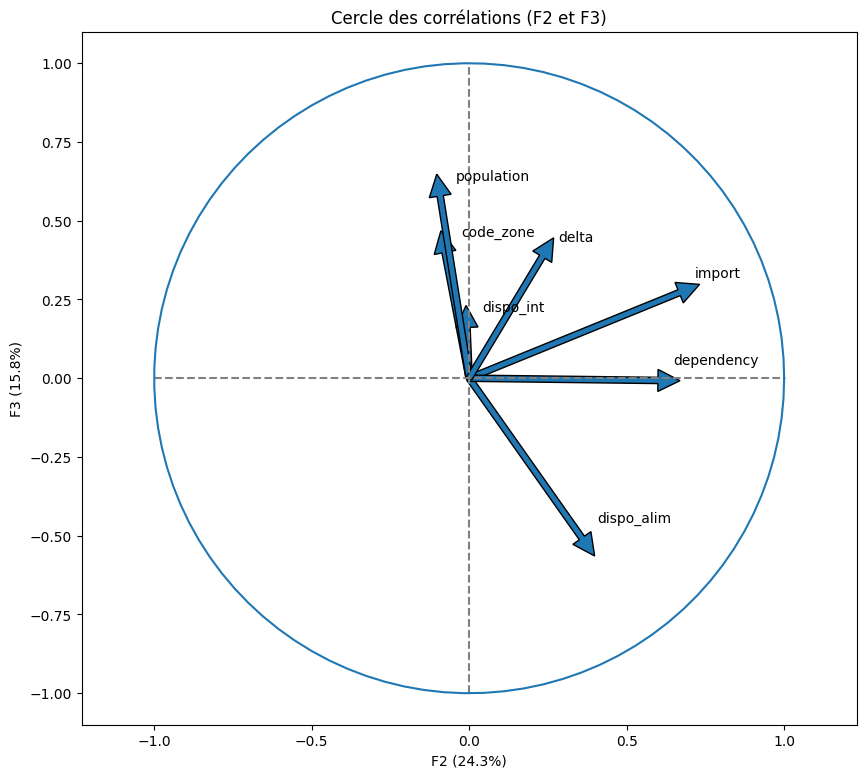

In [108]:
correlation_graph(
    X_scaled,
    pca,
    dim=[1, 2],
)

### Factorial planes

In [109]:
def factorial_planes(
    X_,
    pca,
    dim: list = [0, 1],
    labels: list = None,
    clusters: list = None,
    figsize: list = [12, 10],
    fontsize=14,
):
    """Display the Factorial plane projection of our data

    Positional arguments :
        - X_ : DataFrame | np.array : the scaled dataset
        - pca : PCA : a PCA instance already fitted

    Optional arguments :
        - dim : list or tuple : values x,y for the dimensions (PC) to plot.
            default :  [0,1] stands for F1, F2
        - labels : list or tuple or None: labels of our data such as countrie's name for instance
        - clusters : list or tuple or None : clusters of our data such as 'A', 'B', 'C' for instance
        - figsize : list or tuple : The size in inches of our visualisation
            default : [12, 10]
        - fontsize : int  : The fontsize of our labels.
            default : 14
    """

    # Extract dimensions
    x, y = dim

    # Manage dtypes errors
    dtypes = (pd.DataFrame, np.ndarray, pd.Series, list, tuple, set)
    if not isinstance(labels, dtypes):
        labels = []
    if not isinstance(clusters, dtypes):
        clusters = []

    # Fig size
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # Display cluster with specific color IF NEEDED
    if len(clusters):
        sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=clusters)
    else:
        sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y])

    # Display explained variance ratio
    v1 = str(round(100 * pca.explained_variance_ratio_[x])) + " %"
    v2 = str(round(100 * pca.explained_variance_ratio_[y])) + " %"

    # Axes name, with % of explained inertia
    ax.set_xlabel(f"F{x+1} {v1}")
    ax.set_ylabel(f"F{y+1} {v2}")

    # Values for x max et y max
    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1

    # Set limits for x and y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    # Display horizontal and vertical lines
    plt.plot([-x_max, x_max], [0, 0], color="grey", alpha=0.8)
    plt.plot([0, 0], [-y_max, y_max], color="grey", alpha=0.8)

    # Labels and dots
    if len(labels):
        for i, (_x, _y) in enumerate(X_[:, [x, y]]):
            plt.text(
                _x, _y + 0.05, labels[i], fontsize=fontsize, ha="center", va="center"
            )

    # Title and final display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

Plot a basic factorial plane : 

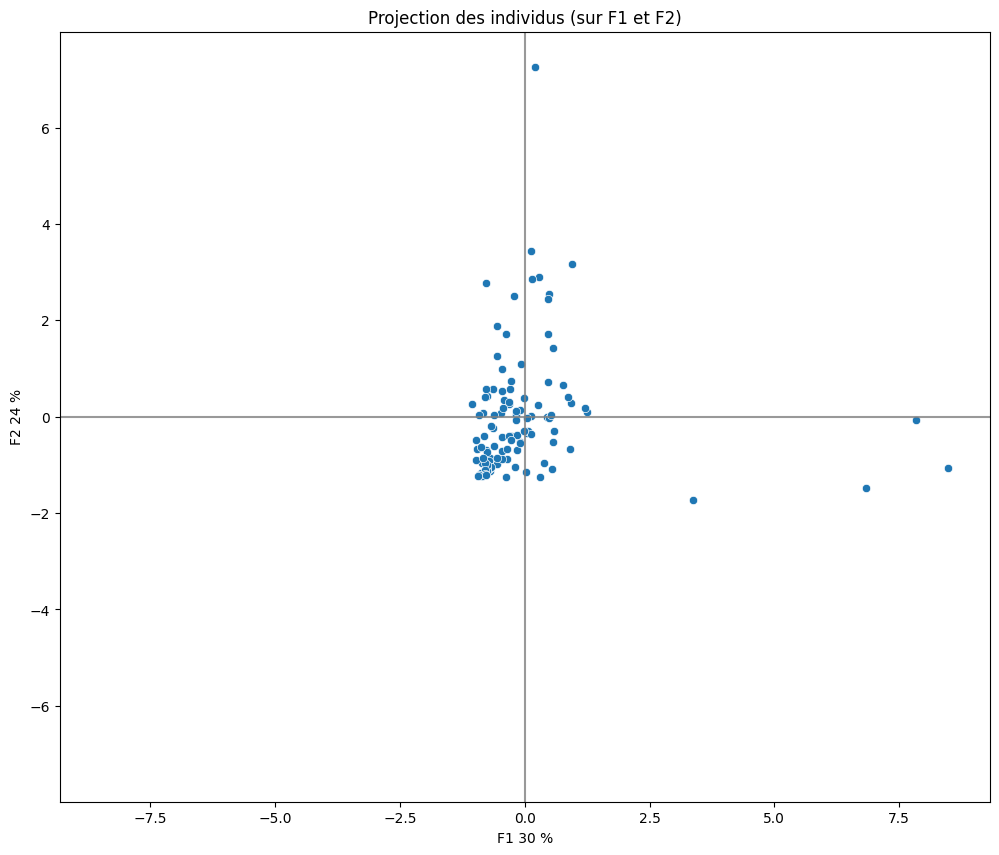

In [110]:
factorial_planes(X_proj.values, pca, [0, 1])

Plot a factorial plane with size and labels : 

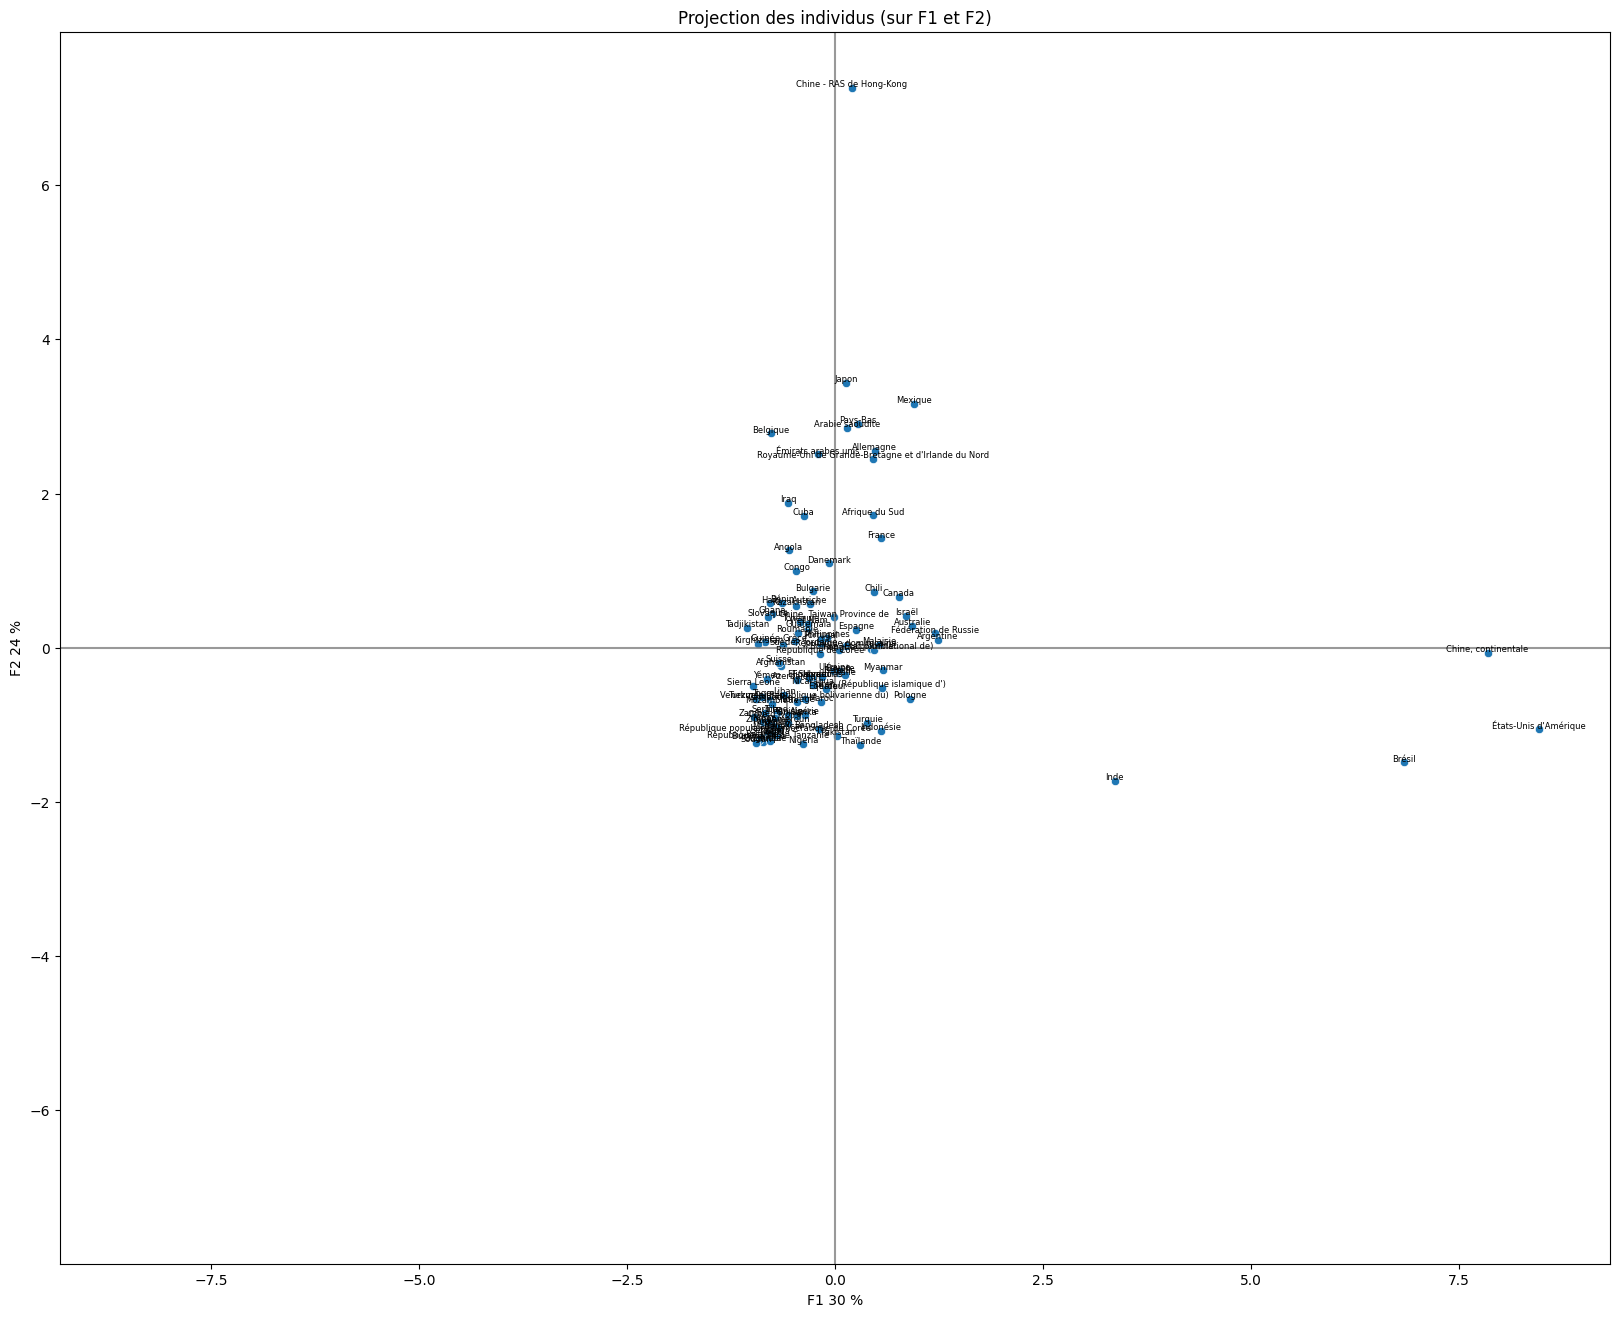

In [111]:
factorial_planes(
    X_proj.values, pca, [0, 1], labels=df.zone.values, figsize=(20, 16), fontsize=6
)